<a href="https://colab.research.google.com/github/mariyakj/ASD/blob/main/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install keras



In [ ]:
#import libraries
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py


# Pretty display for notebooks
%matplotlib inline



In [ ]:
#mount google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import the dataset
file = '/content/gdrive/MyDrive/Toddler Autism dataset July 2018 new.csv - Toddler Autism dataset July 2018.csv'

# read the csv

asd_data = pd.read_table(file, sep = ',', index_col = None)

In [ ]:
#print some random data
print(asd_data.loc[0])

Case_No                                1
A1                                     0
A2                                     0
A3                                     0
A4                                     0
A5                                     0
A6                                     0
A7                                     1
A8                                     1
A9                                     0
A10                                    1
Age_Mons                              28
Qchat-10-Score                         3
Sex                                    f
Ethnicity                 middle eastern
Jaundice                             yes
Family_mem_with_ASD                   no
Who completed the test     family member
contry_of_res                    Austria
used_app_before                       no
Class/ASD Traits                       0
Name: 0, dtype: object


In [ ]:
#print patient records
asd_data.loc[:10]
data=asd_data

In [ ]:
# print out a description of the dataframe
asd_data.describe()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524,0.689753
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304,0.462814
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000,0.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000,1.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000,1.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,1.000000


In [ ]:
# Analysing the data
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD Traits '] == 1])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD Traits '] == 0])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))
print ("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))



Total number of records: 1054
Individuals diagonised with ASD: 727
Individuals not diagonised with ASD: 327
Percentage of individuals diagonised with ASD: 68.98%


In [ ]:
asd_data = pd.read_csv('/content/gdrive/MyDrive/Toddler Autism dataset July 2018 new.csv - Toddler Autism dataset July 2018.csv', na_values=['?'])
asd_data.head(n=5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,contry_of_res,used_app_before,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,...,28,3,f,middle eastern,yes,no,family member,Austria,no,0
1,2,1,1,0,0,0,1,1,0,0,...,36,4,m,Asia,yes,no,family member,India,no,1
2,3,1,0,0,0,0,0,1,1,0,...,36,4,m,White-European,yes,no,family member,United States,no,1
3,4,1,1,1,1,1,1,1,1,1,...,24,10,m,White-European,no,no,family member,United States,no,1
4,5,1,1,0,1,1,1,1,1,1,...,20,9,f,Middle-Eastern,no,yes,family member,South Africa,no,1


In [ ]:
asd_data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524,0.689753
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304,0.462814
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000,0.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000,1.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000,1.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,1.000000


In [ ]:
asd_data.loc[(asd_data['Age_Mons'].isnull()) |(asd_data['Qchat-10-Score'].isnull()) |(asd_data['Sex'].isnull())
|(asd_data['Ethnicity'].isnull())|(asd_data['Jaundice'].isnull()) |(asd_data['Family_mem_with_ASD'].isnull())
            |(asd_data['Who completed the test'].isnull())|(asd_data['contry_of_res'].isnull())|(asd_data['used_app_before'].isnull())]

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,contry_of_res,used_app_before,Class/ASD Traits
14,15,0,0,0,0,0,0,0,0,0,...,18,0,m,NaN,no,no,family member,United Arab Emirates,no,0
25,26,0,0,0,0,0,0,0,0,0,...,24,0,f,NaN,no,no,family member,United Arab Emirates,no,0
77,78,0,0,0,0,0,0,0,0,0,...,36,0,m,NaN,no,no,family member,United Arab Emirates,no,0
79,80,1,0,0,0,0,0,0,1,0,...,30,3,m,NaN,no,no,Health Care Professional,United Arab Emirates,no,0
94,95,0,0,0,1,0,0,1,1,1,...,33,5,m,NaN,no,no,family member,United Arab Emirates,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0,0,0,0,0,0,0,0,...,36,0,m,NaN,no,no,family member,United Arab Emirates,no,0
1029,1030,1,1,0,1,0,1,1,1,1,...,36,8,m,NaN,no,yes,family member,United Arab Emirates,no,1
1041,1042,0,0,0,1,0,0,1,0,0,...,25,2,m,NaN,yes,no,family member,Cyprus,no,0
1044,1045,1,1,1,1,1,1,1,1,1,...,25,10,m,NaN,no,yes,family member,United Arab Emirates,no,1


In [ ]:
#clean dataset
asd_data.dropna(inplace=True)
asd_data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Class/ASD Traits
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,525.761089,0.564516,0.444556,0.404234,0.513105,0.523185,0.577621,0.642137,0.454637,0.483871,0.583669,27.851815,5.191532,0.687500
std,304.576059,0.496070,0.497167,0.490991,0.500080,0.499714,0.494187,0.479613,0.498189,0.499992,0.493198,8.014191,2.885925,0.463746
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,259.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000,0.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000,1.000000
75%,788.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,7.000000,1.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,1.000000


In [ ]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD Traits '] == 1])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD Traits '] == 0])

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
contry_of_res             object
used_app_before           object
Class/ASD Traits           int64
dtype: object
Total number of records: 992
Individuals diagonised with ASD: 682
Individuals not diagonised with ASD: 310


In [ ]:
#Step 2: A quick visualization with Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

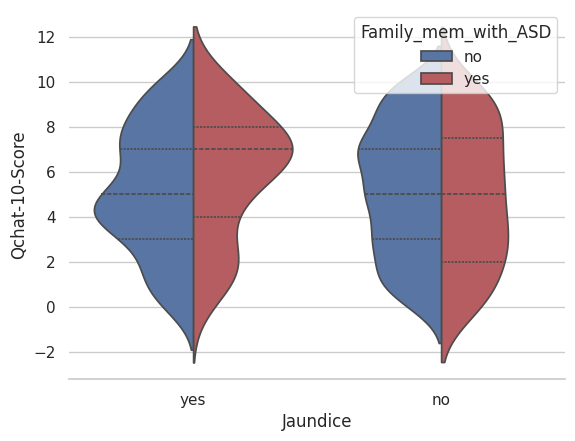

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Jaundice", y="Qchat-10-Score", hue="Family_mem_with_ASD", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

In [ ]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD Traits ']

# Include all features in the dataset
features_raw = asd_data[['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'contry_of_res', 'used_app_before']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age_Mons']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,contry_of_res,used_app_before
0,1,0,0,0,0,0,0,1,1,0,1,0.666667,3,f,middle eastern,yes,no,family member,Austria,no
1,2,1,1,0,0,0,1,1,0,0,0,1.000000,4,m,Asia,yes,no,family member,India,no
2,3,1,0,0,0,0,0,1,1,0,1,1.000000,4,m,White-European,yes,no,family member,United States,no
3,4,1,1,1,1,1,1,1,1,1,1,0.500000,10,m,White-European,no,no,family member,United States,no
4,5,1,1,0,1,1,1,1,1,1,1,0.333333,9,f,Middle-Eastern,no,yes,family member,South Africa,no


In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
#asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)
asd_classes=asd_raw


# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print( "{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,contry_of_res_Spain,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Ukraine,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,used_app_before_no,used_app_before_yes
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
4,5,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


89 total features after one-hot encoding.
['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex_f', 'Sex_m', 'Ethnicity_Asia', 'Ethnicity_Australia', 'Ethnicity_Hispanic', 'Ethnicity_Middle-Eastern', 'Ethnicity_Pacifica', 'Ethnicity_Pasifika', 'Ethnicity_South Asia', 'Ethnicity_White-European', 'Ethnicity_middle eastern', 'Ethnicity_others', 'Jaundice_no', 'Jaundice_yes', 'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes', 'Who completed the test_Health Care Professional', 'Who completed the test_Health care professional', 'Who completed the test_Others', 'Who completed the test_Self', 'Who completed the test_family member', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgi

In [ ]:
# print(features_final)

Text(0, 0.5, 'Frequency')

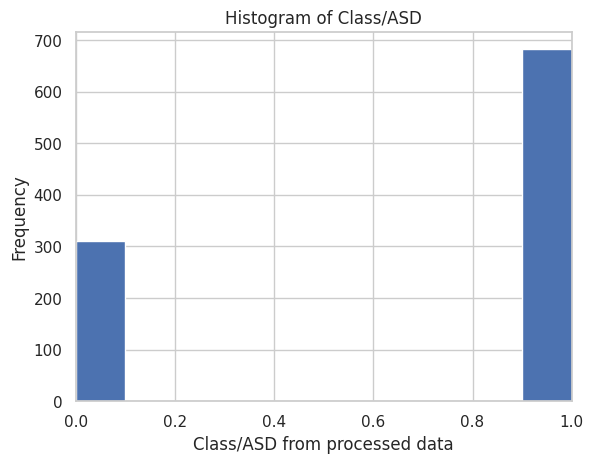

In [ ]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [ ]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print( "Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 793 samples.
Testing set has 199 samples.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# ***********************Decision Tree Classification***********************
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
y_pred_decTree = clf.predict(X_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Select the best pruned model based on cross-validation
scores = [clf.score(X_test, y_test) for clf in clfs]
best_clf = clfs[scores.index(max(scores))]

# Predict on the testing data using the pruned model and evaluate accuracy
y_pred_pruned = best_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy after pruning: {:.2f}".format(accuracy_pruned))



Accuracy of Decision Trees ::  0.9899497487437185
Accuracy after pruning: 0.99


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Train Random Forest Classifier
model = RandomForestClassifier(max_depth=10, n_estimators=30, min_samples_split=3, max_leaf_nodes=5, random_state=22)
model.fit(X_train, y_train)

# Obtain predictions on test data
y_pred_rf = model.predict(X_test)

In [ ]:
#K Nearest Neighbours Classifier
nc = KNeighborsClassifier()
nc.fit(X_train,y_train)
y_pred_nc = nc.predict(X_test)
print("Accuracy of Neighbours Classifier :: ", metrics.accuracy_score(y_test, y_pred_nc))

Accuracy of Neighbours Classifier ::  0.8241206030150754


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Using Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(y_train)
# Evaluate Naive Bayes classifier
print("Naive Bayes Classifier :: ", metrics.accuracy_score(y_test, y_pred_nb))


782    1
49     0
549    1
669    1
20     1
      ..
814    0
74     1
964    1
245    1
39     0
Name: Class/ASD Traits , Length: 793, dtype: int64
Naive Bayes Classifier ::  0.7386934673366834


In [ ]:
from sklearn.svm import SVC

# SVM Classification
svm_model = SVC(kernel='linear', C=1)  # You can customize the kernel and other parameters
svm_model.fit(X_train, y_train)

# Predict on the testing data using the SVM model and evaluate accuracy
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM Classifier: {:.2f}".format(accuracy_svm))


Accuracy of SVM Classifier: 0.99


In [ ]:
print("Decision Tree :: ", metrics.accuracy_score(y_test, y_pred_decTree))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test, y_pred_nc))
print("Naive bayes classifier ::", metrics.accuracy_score(y_test, y_pred_nb))
print("SVM Classifier :: ", accuracy_svm)

Decision Tree ::  0.9899497487437185
Random Forest Classifier ::  0.9899497487437185
K Neighbours Classifier ::  0.8241206030150754
Naive bayes classifier :: 0.7386934673366834
SVM Classifier ::  0.9899497487437185


Confusion Matrix


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       135

    accuracy                           0.99       199
   macro avg       0.99      0.99      0.99       199
weighted avg       0.99      0.99      0.99       199

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       135

    accuracy                           0.99       199
   macro avg       0.99      0.99      0.99       199
weighted avg       0.99      0.99      0.99       199

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.56      0.84      0.68        64
           1       0.90      0.69      0.78       135

    accuracy                           0.74       199
   macro avg 

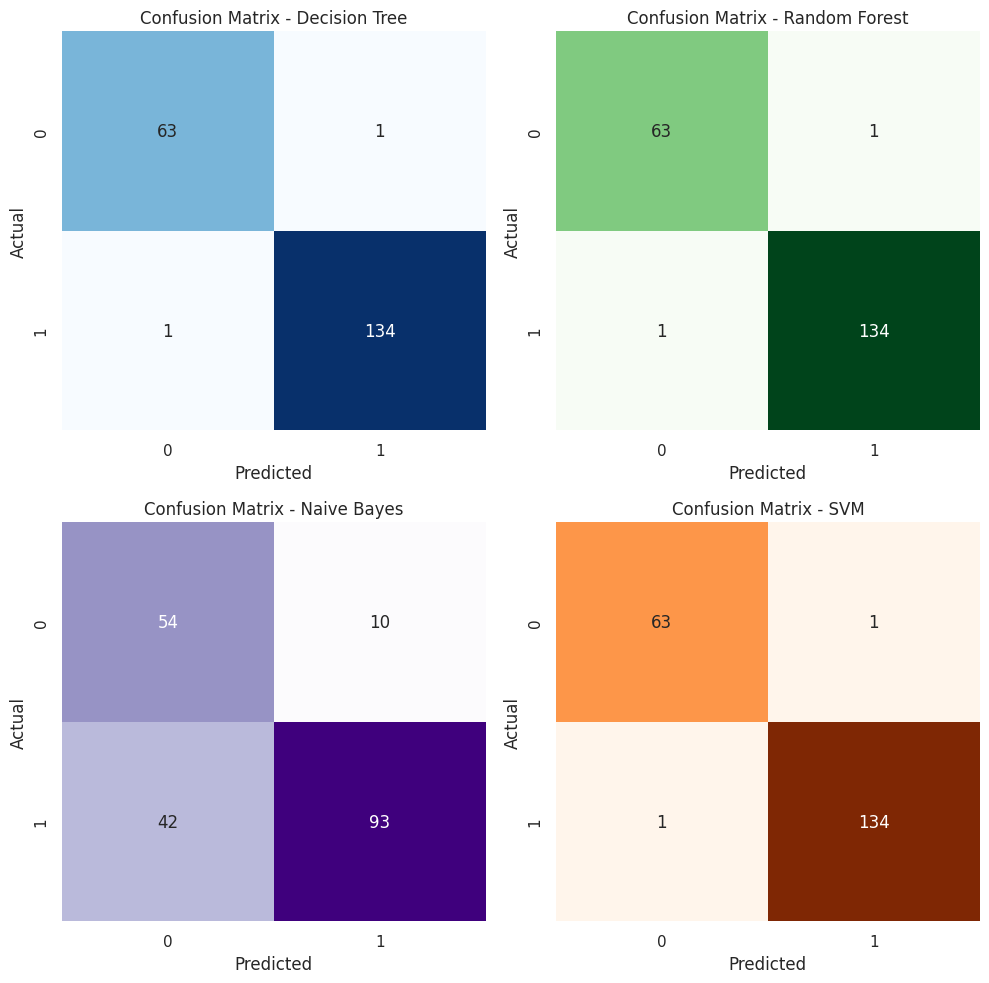

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Precision, Recall, and F1-score for Decision Tree
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_decTree))

# Precision, Recall, and F1-score for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Precision, Recall, and F1-score for Naive Bayes
print("Classification Report - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Precision, Recall, and F1-score for SVM
print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for Decision Tree
cm_decTree = confusion_matrix(y_test, y_pred_decTree)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.heatmap(cm_decTree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 3, 4)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 3, 5)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
import os
import pickle

# Define the directory path
mlmodels_dir ='C:\\Users\\mariy\\OneDrive\\Desktop'


# Make sure the directory exists, create it if necessary
os.makedirs(mlmodels_dir, exist_ok=True)



# Inspect variables before saving
print("best_clf:", best_clf)
print("model:", model)
print("nc:", nc)
print("nb_model:", nb_model)
print("svm_model:", svm_model)

# Save Decision Tree Classifier
with open(os.path.join(mlmodels_dir, 'decision_tree_model.pkl'), 'wb') as f:
    pickle.dump(best_clf, f)

# Save Random Forest Classifier
with open(os.path.join(mlmodels_dir, 'random_forest_model.pkl'), 'wb') as f:
    pickle.dump(model, f)

# Save K Nearest Neighbours Classifier
with open(os.path.join(mlmodels_dir, 'knn_model.pkl'), 'wb') as f:
    pickle.dump(nc, f)

# Save Naive Bayes Classifier
with open(os.path.join(mlmodels_dir, 'naive_bayes_model.pkl'), 'wb') as f:
    pickle.dump(nb_model, f)

# Save SVM Classifier
with open(os.path.join(mlmodels_dir, 'svm_model.pkl'), 'wb') as f:
    pickle.dump(svm_model, f)


best_clf: DecisionTreeClassifier()
model: RandomForestClassifier(max_depth=10, max_leaf_nodes=5, min_samples_split=3,
                       n_estimators=30, random_state=22)
nc: KNeighborsClassifier()
nb_model: GaussianNB()
svm_model: SVC(C=1, kernel='linear')


In [ ]:
import os
import pickle

# Define the directory path (modify as needed)
mlmodels_dir = 'C:\\Users\\mariy\\OneDrive\\Desktop\\autism\\autism\\autismapp\\mlmodels'

# Create the directory if it doesn't exist, handling potential errors
try:
    os.makedirs(mlmodels_dir, exist_ok=True)
except OSError as e:
    print(f"Error creating directory: {e}. Please ensure you have write permissions to this location.")

# Inspect variables before saving (replace with your actual model variables)
print("best_clf (for example):", "<content of best_clf>")
print("model (for example):", "<content of model>")
print("nc (for example):", "<content of nc>")
print("nb_model (for example):", "<content of nb_model>")
print("svm_model (for example):", "<content of svm_model>")

# Save models using exception handling for better error feedback
try:
    with open(os.path.join(mlmodels_dir, 'decision_tree_model.pkl'), 'wb') as f:
        pickle.dump(best_clf, f)
    print("Decision Tree model saved successfully.")
except Exception as e:
    print(f"Error saving Decision Tree model: {e}")

try:
    with open(os.path.join(mlmodels_dir, 'random_forest_model.pkl'), 'wb') as f:
        pickle.dump(model, f)
    print("Random Forest model saved successfully.")
except Exception as e:
    print(f"Error saving Random Forest model: {e}")

# Repeat the try-except block for each model you want to save (KNN, Naive Bayes, SVM)

# (Optional) Add code to load and use the saved models (replace with your use case)
# ...


best_clf (for example): <content of best_clf>
model (for example): <content of model>
nc (for example): <content of nc>
nb_model (for example): <content of nb_model>
svm_model (for example): <content of svm_model>
Decision Tree model saved successfully.
Random Forest model saved successfully.


In [ ]:
from google.colab import drive
import pickle

# Mount Google Drive
drive.mount('/content/drive')

# Define the path in Google Drive where you want to save the models
ml_models_dir = '/content/drive/My Drive/ml_models/'

# Create the directory if it doesn't exist
import os
os.makedirs(ml_models_dir, exist_ok=True)

# Define your machine learning models
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Save Decision Tree Classifier
with open(os.path.join(ml_models_dir, 'decision_tree_model.pkl'), 'wb') as f:
    pickle.dump(decision_tree_model, f)

# Save Random Forest Classifier
with open(os.path.join(ml_models_dir, 'random_forest_model.pkl'), 'wb') as f:
    pickle.dump(random_forest_model, f)


Mounted at /content/drive


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Training the model
model = RandomForestClassifier(max_depth=10, n_estimators=30, min_samples_split=3, max_leaf_nodes=5, random_state=22)
model.fit(X_train, y_train)

# Saving the trained model to a file
model_path = '/content/drive/My Drive/ml_models/random_forest_model.pkl'  # Update with the actual path
joblib.dump(model, model_path)

# Now the model is saved and can be loaded later for making predictions


['/content/drive/My Drive/ml_models/random_forest_model.pkl']

In [ ]:
import joblib


# Assuming you have already imported RandomForestClassifier and other necessary modules

# Load the trained model
model_path = '/content/drive/My Drive/ml_models/random_forest_model.pkl'  # Update with the actual path
rft = joblib.load(model_path)  # or use pickle.load() if you saved with pickle

# Check if the model has been fitted
if hasattr(rft, 'estimators_') and hasattr(rft, 'classes_'):
    print("Model is fitted and ready for prediction.")
else:
    print("Model has not been fitted yet. Please fit the model before making predictions.")


Model is fitted and ready for prediction.


In [ ]:
import pickle

# Load the pickle file
with open('/content/gdrive/My Drive/ml_models/random_forest_model.pkl', 'rb') as f:
    loaded_object = pickle.load(f)

# Inspect the loaded object
print(loaded_object)





['Case_No' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'Age_Mons'
 'Qchat-10-Score' 'Sex_f' 'Sex_m' 'Ethnicity_Asia' 'Ethnicity_Australia'
 'Ethnicity_Hispanic' 'Ethnicity_Middle-Eastern' 'Ethnicity_Pacifica'
 'Ethnicity_Pasifika' 'Ethnicity_South Asia' 'Ethnicity_White-European'
 'Ethnicity_middle eastern' 'Ethnicity_others' 'Jaundice_no'
 'Jaundice_yes' 'Family_mem_with_ASD_no' 'Family_mem_with_ASD_yes'
 'Who completed the test_Health Care Professional'
 'Who completed the test_Health care professional'
 'Who completed the test_Others' 'Who completed the test_Self'
 'Who completed the test_family member' 'contry_of_res_Afghanistan'
 'contry_of_res_AmericanSamoa' 'contry_of_res_Angola'
 'contry_of_res_Argentina' 'contry_of_res_Armenia' 'contry_of_res_Aruba'
 'contry_of_res_Australia' 'contry_of_res_Austria'
 'contry_of_res_Azerbaijan' 'contry_of_res_Bahamas'
 'contry_of_res_Bangladesh' 'contry_of_res_Belgium'
 'contry_of_res_Bolivia' 'contry_of_res_Brazil' 'contry_of_res_Burund

In [ ]:
print(model.feature_names_in_)


['Case_No' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'Age_Mons'
 'Qchat-10-Score' 'Sex' 'Ethnicity' 'Jaundice' 'Family_mem_with_ASD'
 'Who completed the test' 'contry_of_res' 'used_app_before']


In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load the training data
train_data_path = '/content/gdrive/MyDrive/Toddler Autism dataset July 2018 new.csv - Toddler Autism dataset July 2018.csv'
train_data = pd.read_csv(train_data_path)

# Define features and target variable
X = train_data.drop(columns=['Class/ASD Traits '])  # Features
y = train_data['Class/ASD Traits ']  # Target variable

# Define the columns that need to be one-hot encoded
categorical_features = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'contry_of_res', 'used_app_before']

# Create a pipeline for preprocessing (one-hot encoding categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())  # You can replace DecisionTreeClassifier with any other classifier
])

# Fit the model
pipeline.fit(X, y)

# Save the trained model
model_path = '/content/gdrive/MyDrive/ml_models/decision_tree_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(pipeline, file)

# Function to get user input for the 20 features
def get_user_input(train_data):
    features = []
    print("Enter values for the 20 features:")

    # Integer features
    for i in range(13):
        value = int(input(f"Feature {i+1}: "))
        features.append(value)

    # Categorical features
    for feature in categorical_features:
        # Ensure that the user input matches the categories in the training data
        valid_categories = train_data[feature].unique()
        while True:
            value = input(f"{feature}: ")
            if value in valid_categories:
                features.append(value)
                break
            else:
                print(f"Invalid input! Please enter one of the following categories: {', '.join(valid_categories)}")

    return pd.DataFrame([features], columns=X.columns)

# Get user input for the 20 features
user_features = get_user_input(train_data)

# Perform prediction
prediction = pipeline.predict(user_features)

# Print the prediction
if prediction[0] == 0:
    print("Prediction: Non-autistic")
else:
    print("Prediction: Autistic")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Enter values for the 20 features:
Feature 1: 1
Feature 2: 0
Feature 3: 0
Feature 4: 0
Feature 5: 0
Feature 6: 0
Feature 7: 0
Feature 8: 1
Feature 9: 0
Feature 10: 0
Feature 11: 1
Feature 12: 36
Feature 13: 2
Sex: m
Ethnicity: White-European
Jaundice: no
Family_mem_with_ASD: no
Who completed the test: family member
contry_of_res: Brazil
used_app_before: no
Prediction: Non-autistic


In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Ensure to import the appropriate model class
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Load the Random Forest model
model_path = '/content/gdrive/MyDrive/ml_models/decision_tree_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Check the type of the loaded object
print(type(model))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
